In [43]:
import pandas as pd
import numpy as np

In [127]:
data = pd.read_excel("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/3_SPF/spf.data.xlsx", header=2)

In [128]:
data.head()

,Seg,Y,Clus.len,Seg.len,X1,X2,X3,X4
0,1,3,582.269027,714.269027,0.714269,7327,2.800065,2
1,2,3,361.029199,493.029199,0.493029,7327,4.056555,2
2,3,4,697.282659,829.282659,0.829283,7327,1.205861,1
3,4,9,1401.893619,1533.893619,1.533894,7327,1.955807,3
4,5,5,1032.272347,1164.272347,1.164272,7327,0.000000,0


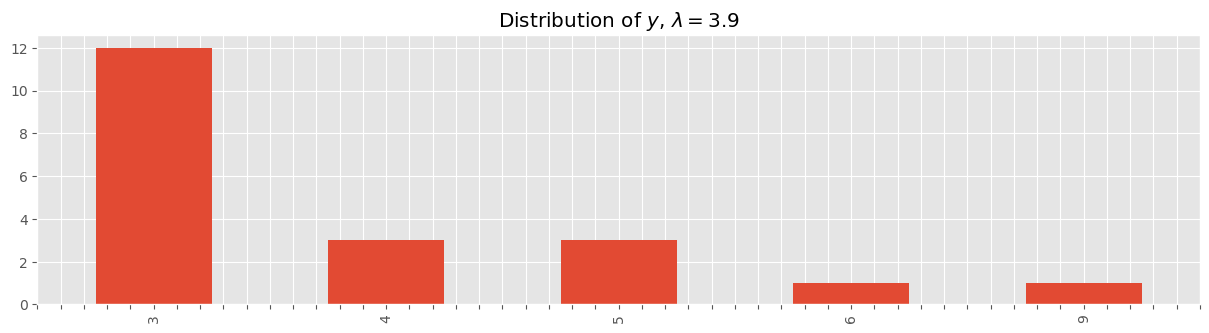

In [129]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

m = data['Y'].mean()
s = data['Y'].value_counts().sort_index()
ax = s.plot(kind='bar', figsize=(15, 3.5), title=rf'Distribution of $y$, $\lambda={m:.1f}$')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [65]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import NegativeBinomial

In [61]:
print(data['Y'].mean())
print(data['Y'].var())

3.9
2.305263157894737


In [130]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
#X = add_constant(X)

In [131]:
np.log(np.mean(Y))

1.3609765531356006

************************************************************
BIC:  -50.582943406117145
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -48.902
Date:                Tue, 06 Dec 2022   Deviance:                      0.34451
Time:                        16:50:20   Pearson chi2:                    0.365
No. Iterations:                     2   Pseudo R-squ. (CS):            0.06637
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


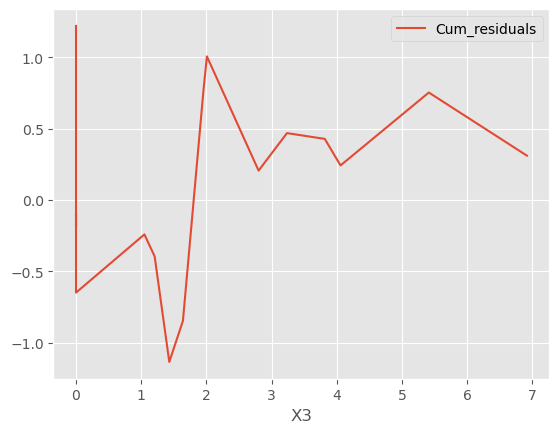

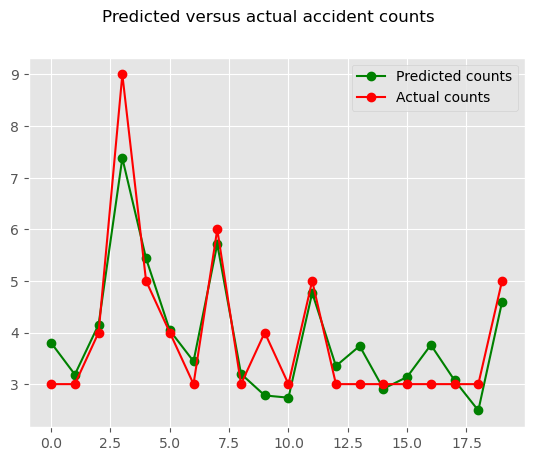

In [126]:
model = sm.GLM(Y, X, family=sm.families.NegativeBinomial())
model_fitted = model.fit(method='newton', maxiter=1000)
print("************************************************************")
print("BIC: ", model_fitted.bic)
print(model_fitted.summary())
    
# CURE plot
data["fitted"] = model_fitted.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X3'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X3', y= 'Cum_residuals')
    
# Predicted vs. Actual plot
nb_predictions = model_fitted.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

************************************************************
alpha:  0.01 BIC:  -49.3852399915483
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -33.079
Date:                Tue, 06 Dec 2022   Deviance:                       1.5422
Time:                        17:11:20   Pearson chi2:                     1.61
No. Iterations:                     2   Pseudo R-squ. (CS):             0.3104
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


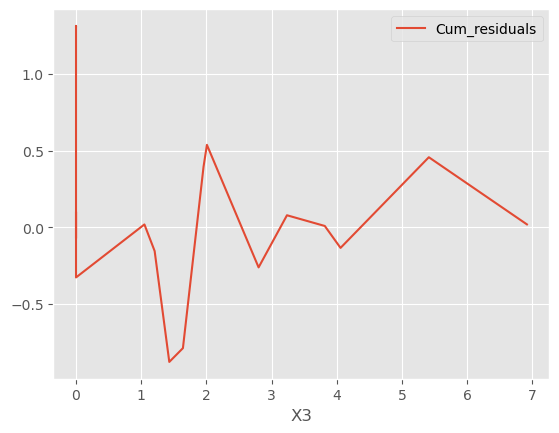

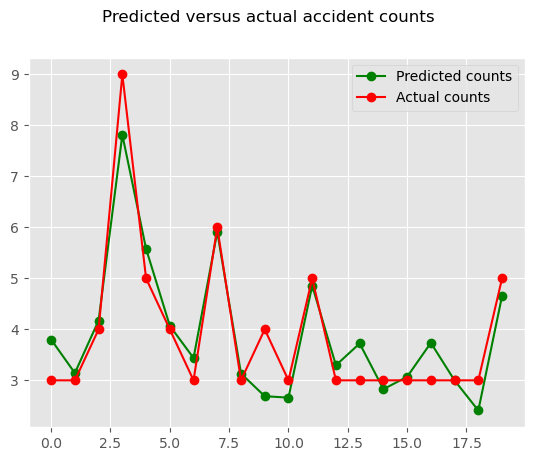

************************************************************
alpha:  0.27263157894736845 BIC:  -50.12994812543033
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -39.638
Date:                Tue, 06 Dec 2022   Deviance:                      0.79750
Time:                        17:11:20   Pearson chi2:                    0.841
No. Iterations:                     2   Pseudo R-squ. (CS):             0.1567
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


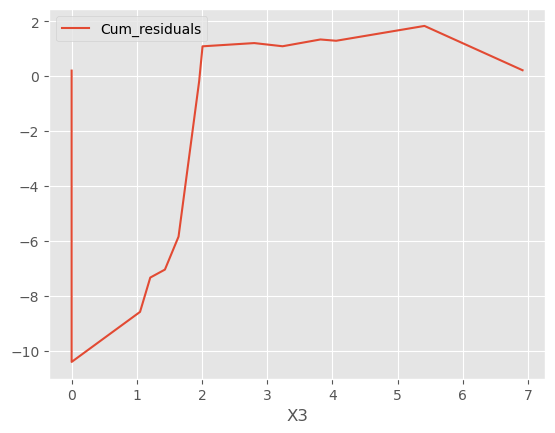

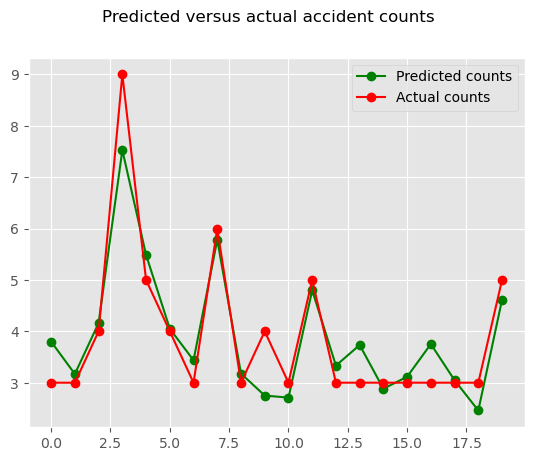

************************************************************
alpha:  0.5352631578947369 BIC:  -50.38704482266487
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -43.794
Date:                Tue, 06 Dec 2022   Deviance:                      0.54040
Time:                        17:11:21   Pearson chi2:                    0.572
No. Iterations:                     2   Pseudo R-squ. (CS):             0.1050
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


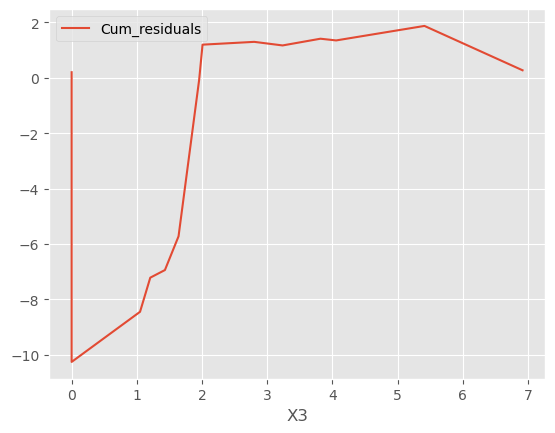

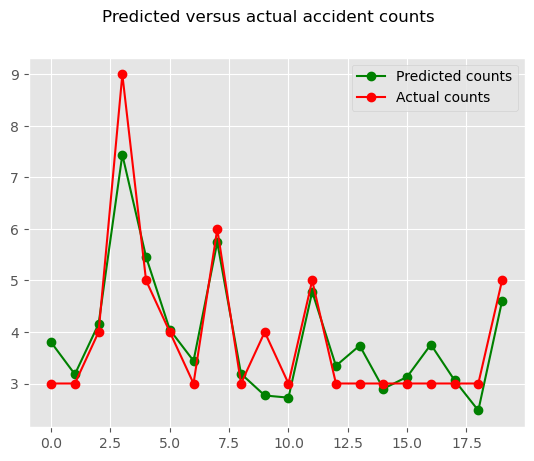

************************************************************
alpha:  0.7978947368421053 BIC:  -50.518510169721985
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -46.915
Date:                Tue, 06 Dec 2022   Deviance:                      0.40894
Time:                        17:11:22   Pearson chi2:                    0.433
No. Iterations:                     2   Pseudo R-squ. (CS):            0.07902
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


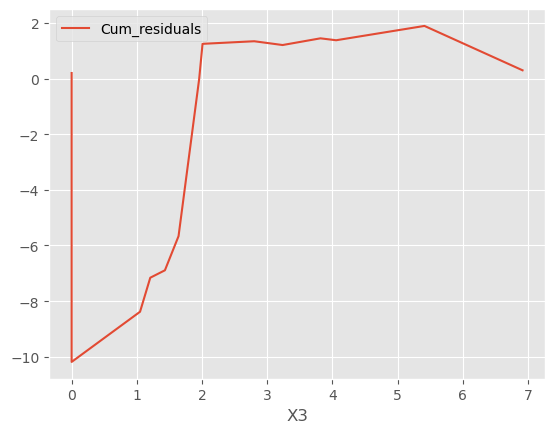

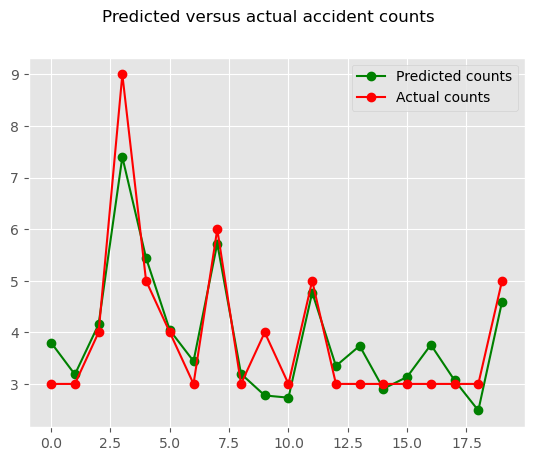

************************************************************
alpha:  1.0605263157894738 BIC:  -50.59846238344153
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -49.446
Date:                Tue, 06 Dec 2022   Deviance:                      0.32899
Time:                        17:11:23   Pearson chi2:                    0.349
No. Iterations:                     2   Pseudo R-squ. (CS):            0.06334
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


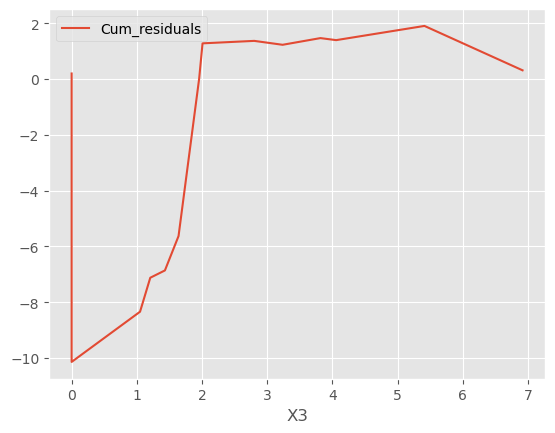

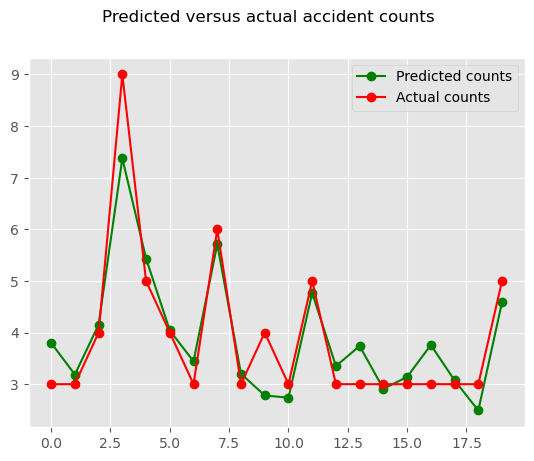

************************************************************
alpha:  1.3231578947368423 BIC:  -50.65224247363274
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -51.590
Date:                Tue, 06 Dec 2022   Deviance:                      0.27521
Time:                        17:11:23   Pearson chi2:                    0.292
No. Iterations:                     2   Pseudo R-squ. (CS):            0.05285
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


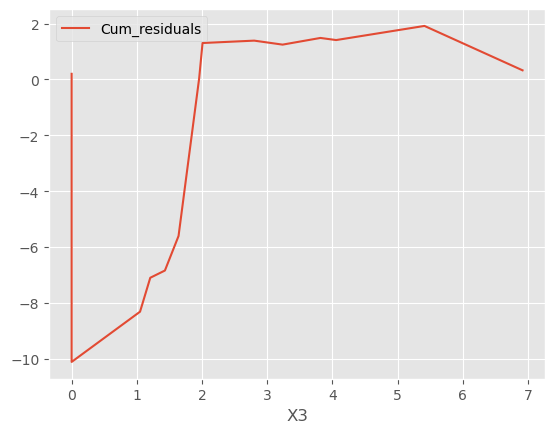

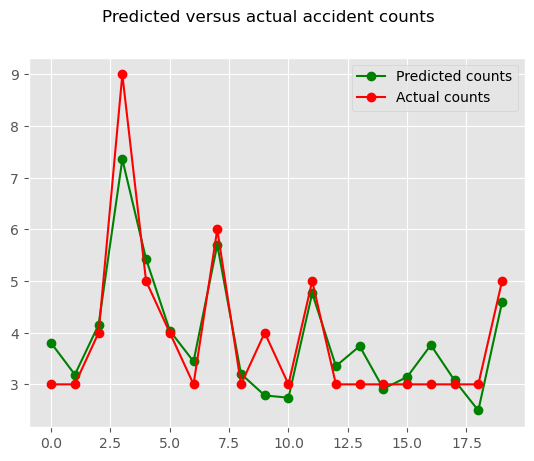

************************************************************
alpha:  1.5857894736842106 BIC:  -50.690901100466775
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -53.460
Date:                Tue, 06 Dec 2022   Deviance:                      0.23655
Time:                        17:11:24   Pearson chi2:                    0.251
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04534
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


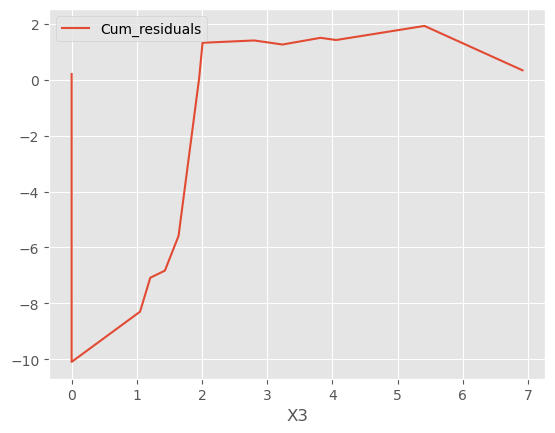

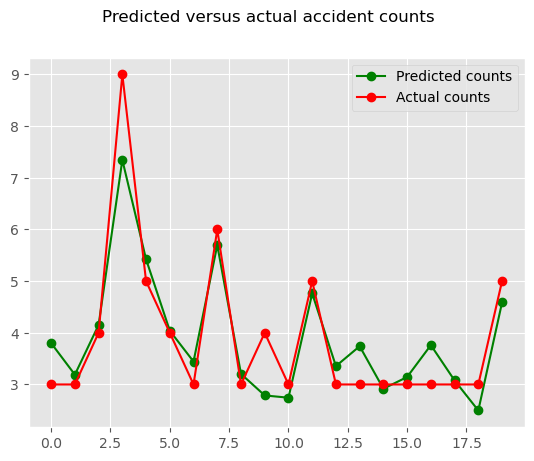

************************************************************
alpha:  1.848421052631579 BIC:  -50.720032421293034
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -55.123
Date:                Tue, 06 Dec 2022   Deviance:                      0.20742
Time:                        17:11:25   Pearson chi2:                    0.220
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03971
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


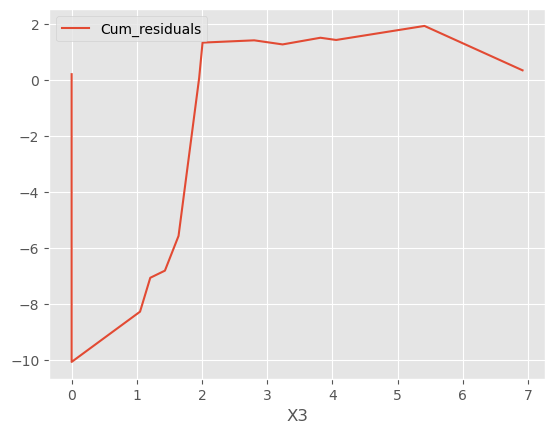

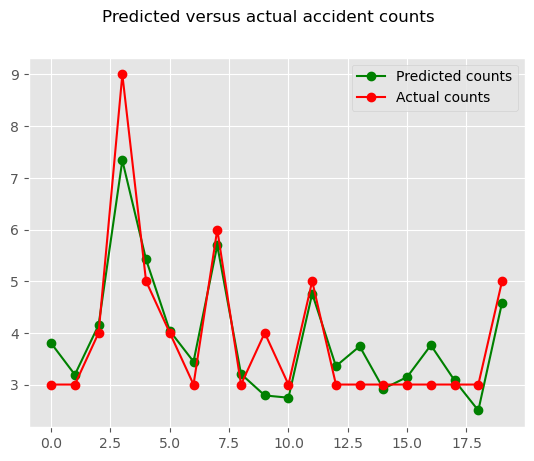

************************************************************
alpha:  2.1110526315789473 BIC:  -50.74277315809229
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -56.624
Date:                Tue, 06 Dec 2022   Deviance:                      0.18468
Time:                        17:11:25   Pearson chi2:                    0.196
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03531
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


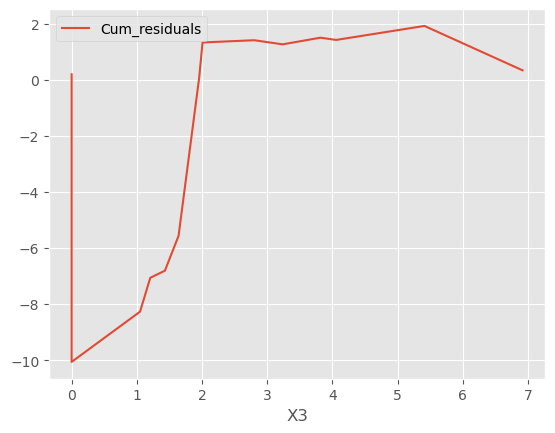

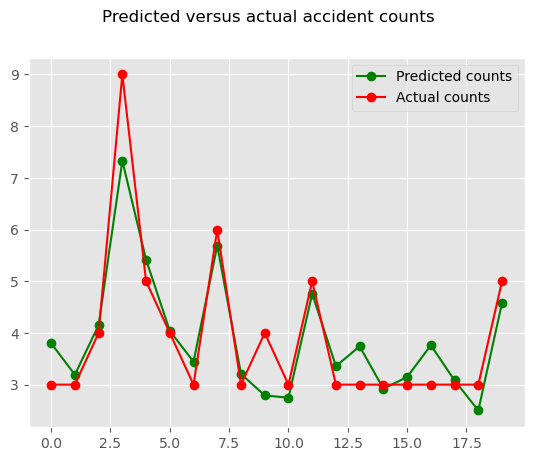

************************************************************
alpha:  2.373684210526316 BIC:  -50.761018866195684
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -57.996
Date:                Tue, 06 Dec 2022   Deviance:                      0.16643
Time:                        17:11:26   Pearson chi2:                    0.177
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03180
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


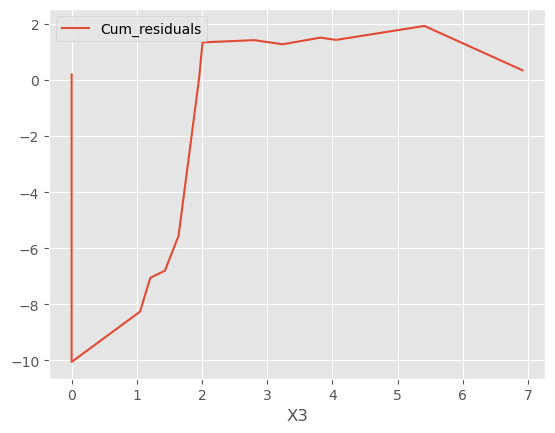

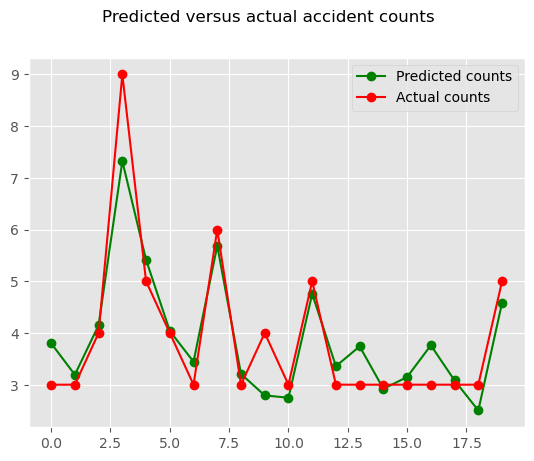

************************************************************
alpha:  2.6363157894736844 BIC:  -50.775982714301364
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -59.259
Date:                Tue, 06 Dec 2022   Deviance:                      0.15147
Time:                        17:11:26   Pearson chi2:                    0.161
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02892
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


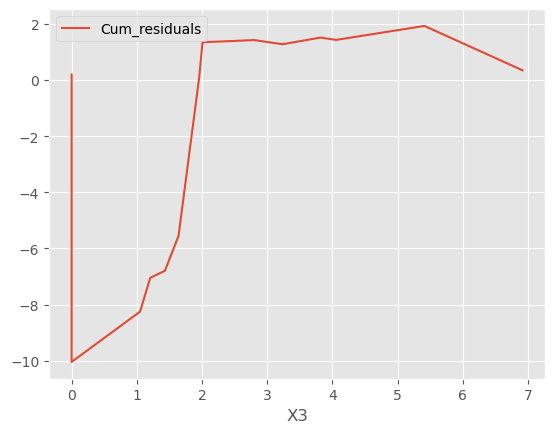

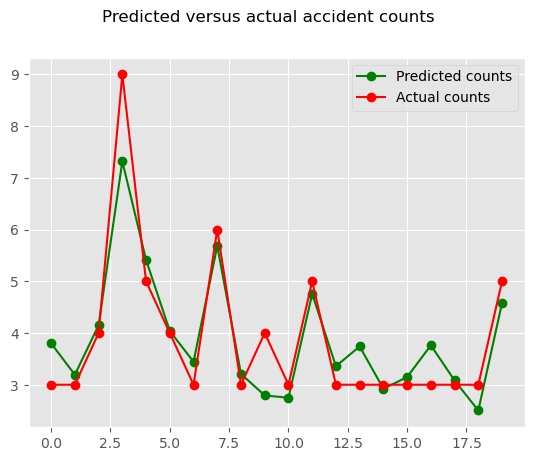

************************************************************
alpha:  2.8989473684210525 BIC:  -50.78847725879358
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -60.432
Date:                Tue, 06 Dec 2022   Deviance:                      0.13897
Time:                        17:11:27   Pearson chi2:                    0.148
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02652
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


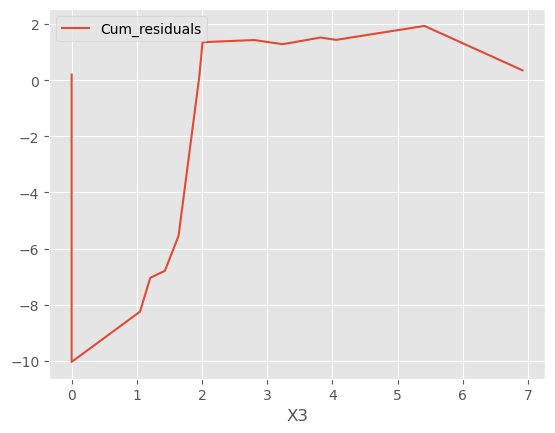

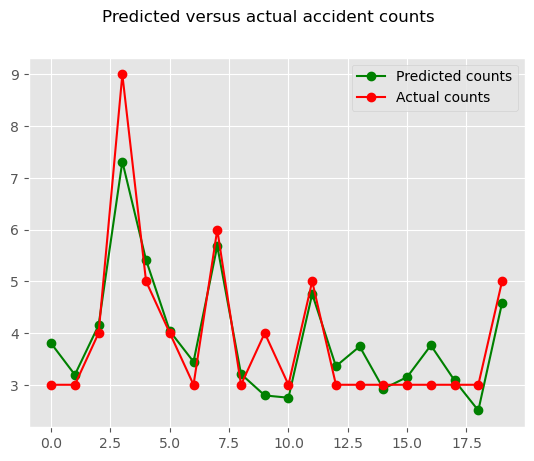

************************************************************
alpha:  3.161578947368421 BIC:  -50.79906722304201
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -61.528
Date:                Tue, 06 Dec 2022   Deviance:                      0.12838
Time:                        17:11:28   Pearson chi2:                    0.137
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02448
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


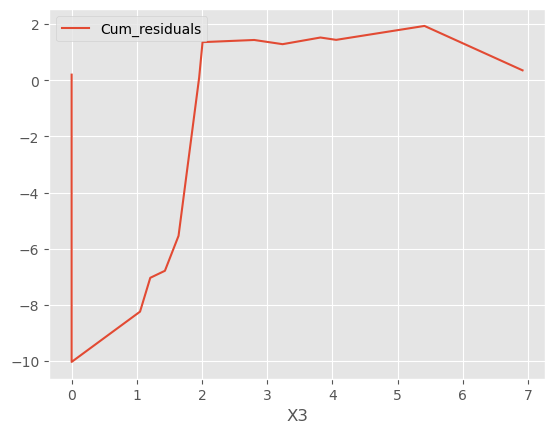

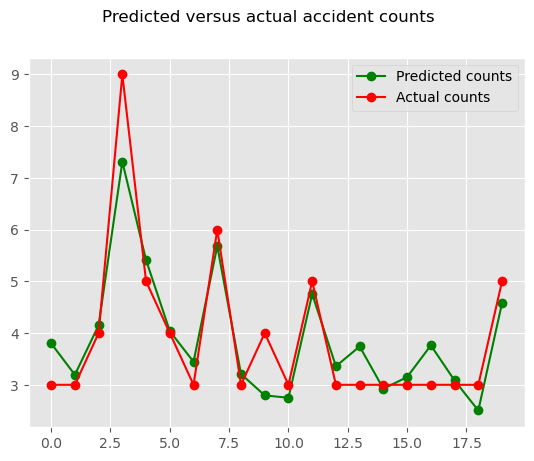

************************************************************
alpha:  3.4242105263157896 BIC:  -50.80815730384921
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -62.556
Date:                Tue, 06 Dec 2022   Deviance:                      0.11929
Time:                        17:11:28   Pearson chi2:                    0.127
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02274
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


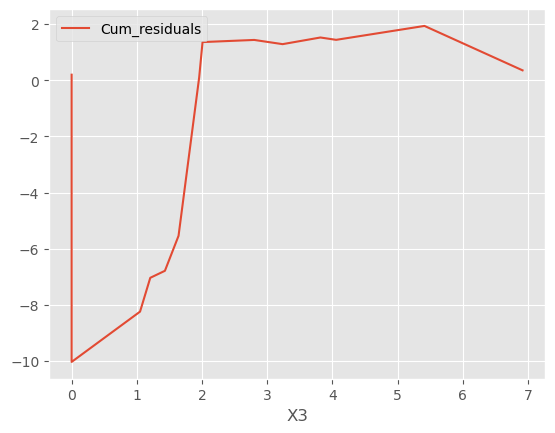

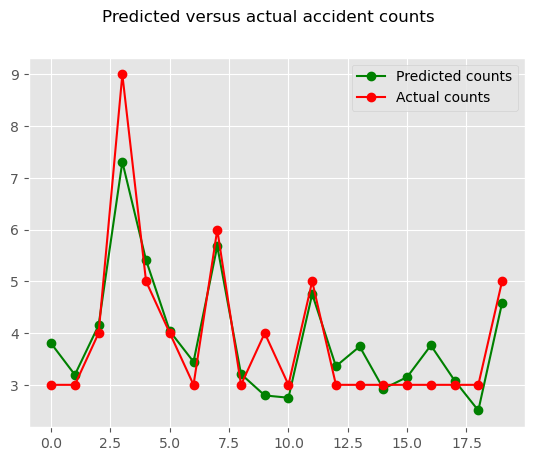

************************************************************
alpha:  3.6868421052631577 BIC:  -50.816045112008894
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -63.525
Date:                Tue, 06 Dec 2022   Deviance:                      0.11140
Time:                        17:11:29   Pearson chi2:                    0.119
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02123
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


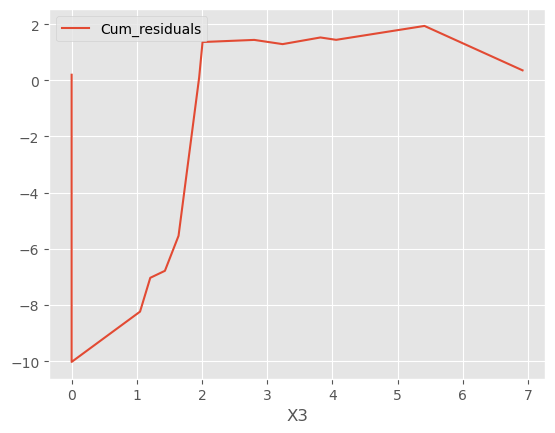

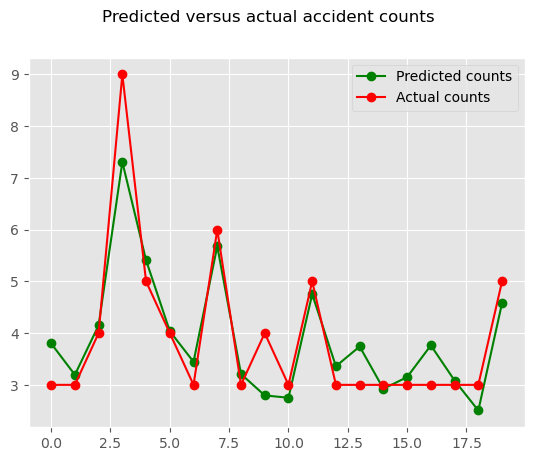

************************************************************
alpha:  3.9494736842105262 BIC:  -50.82295439807186
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -64.443
Date:                Tue, 06 Dec 2022   Deviance:                      0.10449
Time:                        17:11:30   Pearson chi2:                    0.111
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01991
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


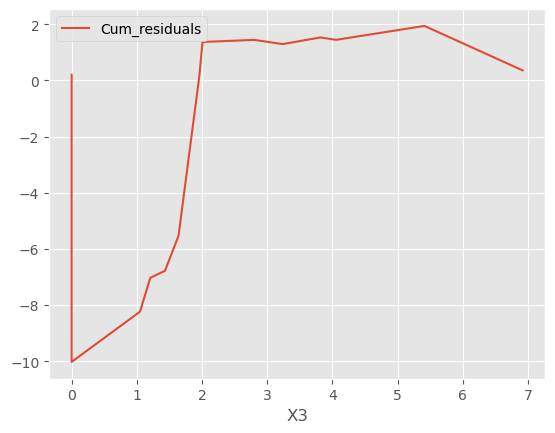

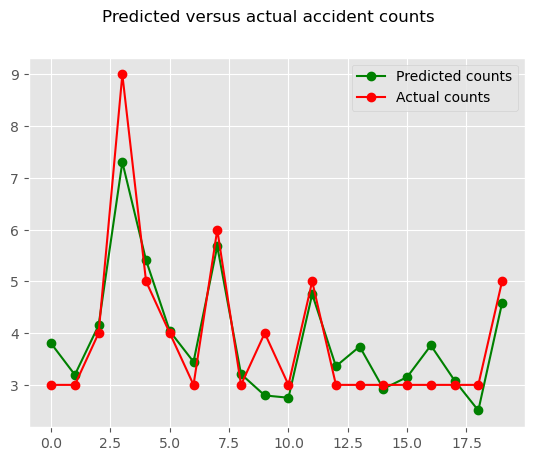

************************************************************
alpha:  4.212105263157895 BIC:  -50.82905662892312
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -65.314
Date:                Tue, 06 Dec 2022   Deviance:                     0.098392
Time:                        17:11:31   Pearson chi2:                    0.105
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01874
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


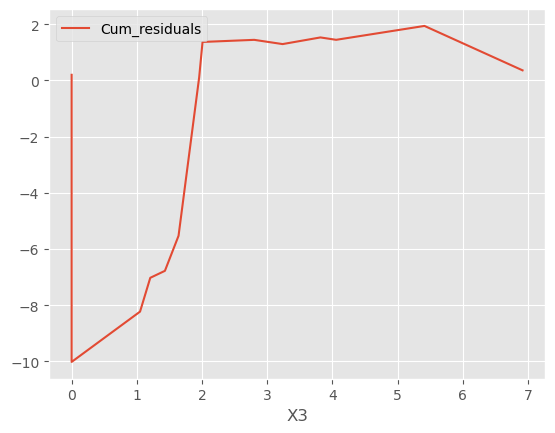

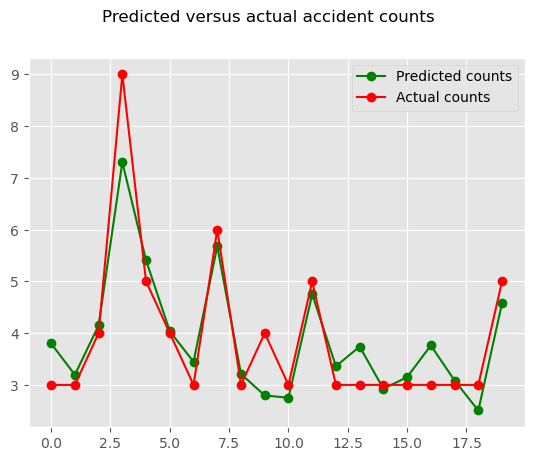

************************************************************
alpha:  4.474736842105263 BIC:  -50.83448541751977
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -66.143
Date:                Tue, 06 Dec 2022   Deviance:                     0.092963
Time:                        17:11:31   Pearson chi2:                   0.0989
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01770
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


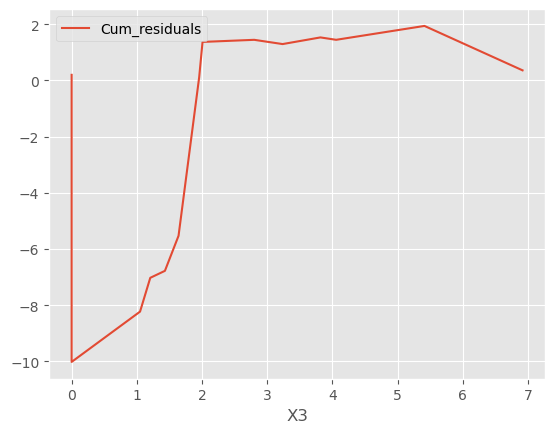

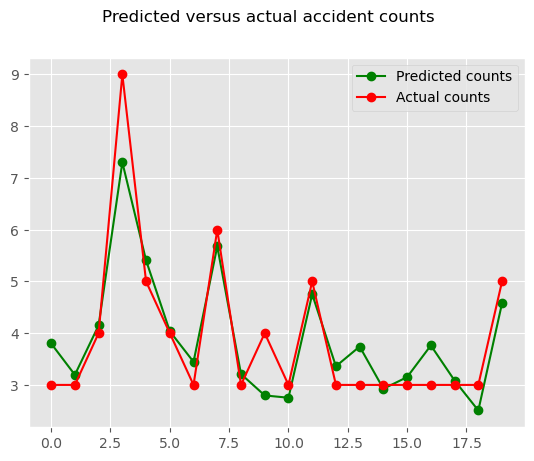

************************************************************
alpha:  4.737368421052632 BIC:  -50.8393464233142
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -66.935
Date:                Tue, 06 Dec 2022   Deviance:                     0.088102
Time:                        17:11:32   Pearson chi2:                   0.0938
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


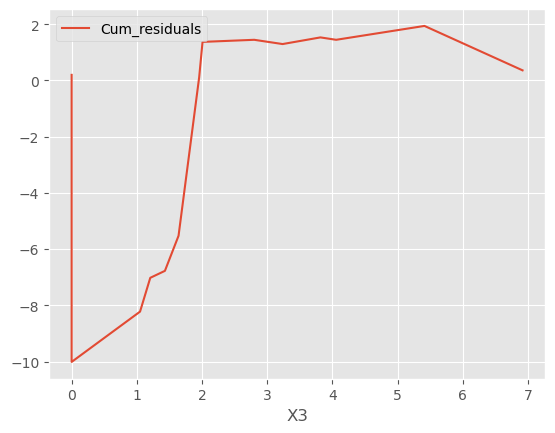

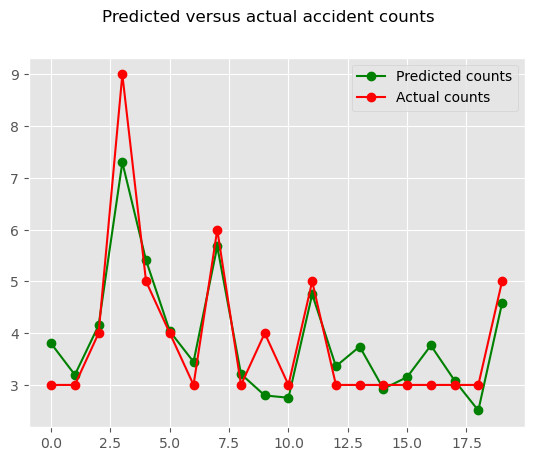

************************************************************
alpha:  5.0 BIC:  -50.843724299664025
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -67.693
Date:                Tue, 06 Dec 2022   Deviance:                     0.083724
Time:                        17:11:33   Pearson chi2:                   0.0891
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01593
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


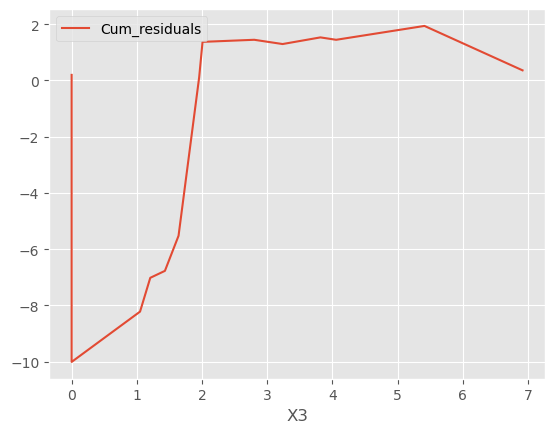

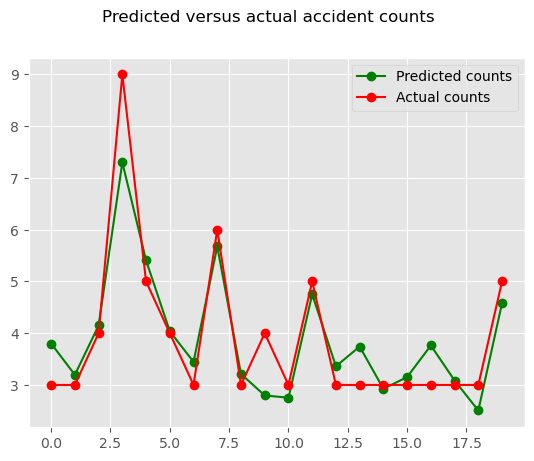

In [132]:

for alpha in np.linspace(0.01, 5, 20):
    model = sm.GLM(Y, X, family=sm.families.NegativeBinomial(alpha=alpha))
    model_fitted = model.fit(method='newton', maxiter=1000)
    print("************************************************************")
    print("alpha: ",alpha, "BIC: ", model_fitted.bic)
    print(model_fitted.summary())
    
    # CURE plot
    data["fitted"] = model_fitted.predict()
    data["residuals"] = data["Y"] - data["fitted"]
    data.sort_values(by=['X3'], ascending=True, inplace=True)
    data["Cum_residuals"] = data["residuals"].cumsum()
    data.plot(x= 'X3', y= 'Cum_residuals')
    
    # Predicted vs. Actual plot
    nb_predictions = model_fitted.predict(X)
    actual_counts = Y
    fig = plt.figure()
    fig.suptitle('Predicted versus actual accident counts')
    predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
    actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()

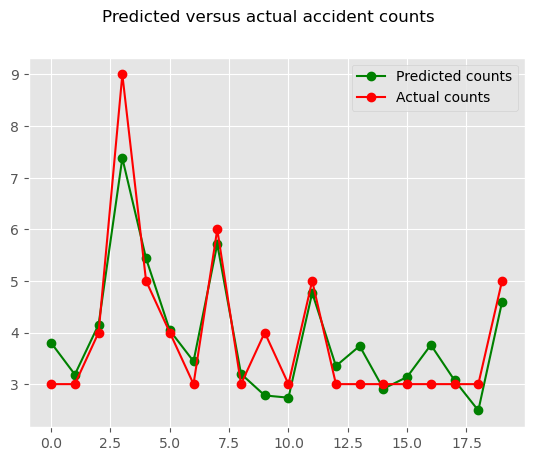

In [84]:
nb_predictions = model_fitted.predict()
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [24]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_1 = sm.NegativeBinomial(Y,X).fit()
print(model_1.summary())

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1333: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1334: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1243: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

         Current function value: nan
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 2
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   20
Model:               NegativeBinomial   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                     nan
Time:                        00:37:20   Log-Likelihood:                    nan
converged:                      False   LL-Null:                           nan
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1                nan        nan        nan        nan         nan         nan
X2   

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [52]:
data = pd.read_excel("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/3_SPF/spf.data.xlsx", header=2)
X = data[['X1', 'X2', 'X3']]
Y = data['Y']

model_2 = sm.NegativeBinomial(Y,X).fit(method='bfgs', maxiter=1000, start_params=[np.log(np.mean(Y)), 0,0,0])
print(model_2.summary())

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2950: RuntimeWarning: divide by zero encountered in log
  start_params[-1] = np.log(start_params[-1])
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2647: RuntimeWarning: divide by zero encountered in double_scalars
  size = 1/alpha * mu**Q
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2648: RuntimeWarning: invalid value encountered in divide
  prob = size/(size+mu)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2649: RuntimeWarning: invalid value encountered in subtract
  coeff = (gamma_ln(size+endog) - gamma_ln(endog+1) -
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2727: RuntimeWarning: divide by zero encountered in double_scalars
  a1 = 1/alpha * mu**Q
C:\ProgramData\Anaconda3\envs\

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   20
Model:               NegativeBinomial   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                     nan
Time:                        12:25:05   Log-Likelihood:                    nan
converged:                      False   LL-Null:                           nan
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             1.3610        nan        nan        nan         nan         nan
X2   

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


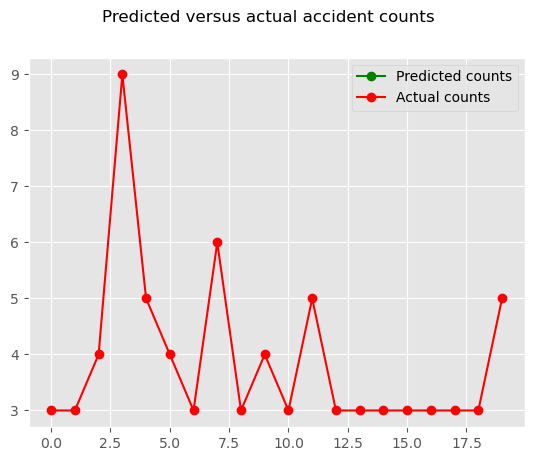

In [11]:
nb_predictions = model_2.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot:xlabel='X1'>

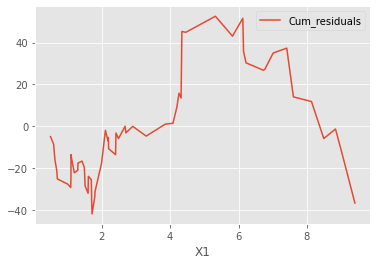

In [12]:
# CURE plot
data["fitted"] = model_2.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [30]:
#Final
data = pd.read_excel("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/3_SPF/spf.data.xlsx", header=2)
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_3 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=10000)
print(model_3.summary())

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1333: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + exposure + offset)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1334: RuntimeWarning: invalid value encountered in multiply
  return -np.dot(L*X.T, X)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:1243: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2950: RuntimeWarning: invalid value encountered in log
  start_params[-1] = np.log(start_params[-1])


Optimization terminated successfully.
         Current function value: nan
         Iterations 1
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   20
Model:               NegativeBinomial   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                     nan
Time:                        00:54:43   Log-Likelihood:                    nan
converged:                       True   LL-Null:                           nan
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1                nan        nan        nan        nan         nan         nan
X2                nan        nan  

C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


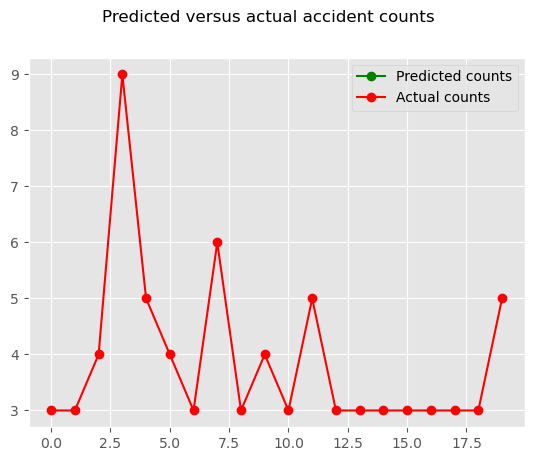

In [15]:
nb_predictions = model_3.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot: xlabel='X1'>

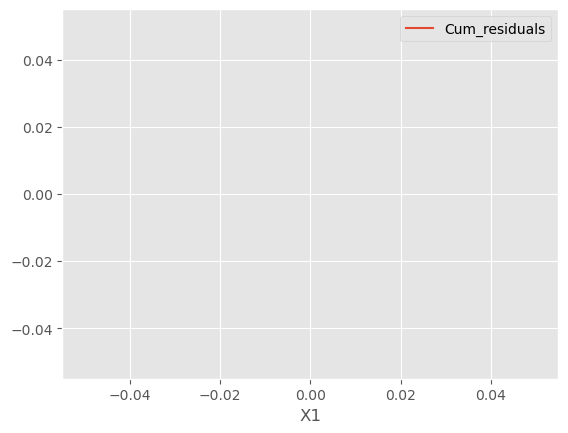

In [16]:
# CURE plot
data["fitted"] = model_3.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X2_scaled = scaler.fit_transform(X.drop(columns=["X1", "X3"]))
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[ 0.0519259 ,  0.        ,  0.51696943],
       [-0.61371185,  0.        ,  1.15130581],
       [ 0.39796402,  0.        , -0.28786147],
       [ 2.51790624,  0.        ,  0.09074718],
       [ 1.40583761,  0.        , -0.8966384 ],
       [ 0.2686977 ,  0.        ,  1.0294835 ],
       [-0.3567329 ,  0.        ,  2.5944508 ],
       [ 1.57322257,  0.        , -0.06895508],
       [-0.55659307,  0.        , -0.8966384 ],
       [-1.07557624,  0.        , -0.8966384 ],
       [-1.16709784,  0.        ,  0.73665218],
       [ 0.90036973,  0.        ,  0.11683957],
       [-0.38471076,  0.        , -0.8966384 ],
       [ 0.00617921,  0.        , -0.17446118],
       [-0.90643255,  0.        , -0.8966384 ],
       [-0.6264012 ,  0.        , -0.8966384 ],
       [ 0.04149276,  0.        , -0.8966384 ],
       [-0.70641018,  0.        , -0.8966384 ],
       [-1.54102563,  0.        ,  1.83499628],
       [ 0.77109647,  0.        , -0.36705984]])

In [30]:
X = pd.DataFrame(X_scaled, columns=['X1', 'X2', 'X3'])
X

,X1,X2,X3
0,0.051926,0.0,0.516969
1,-0.613712,0.0,1.151306
2,0.397964,0.0,-0.287861
3,2.517906,0.0,0.090747
4,1.405838,0.0,-0.896638
5,0.268698,0.0,1.029483
6,-0.356733,0.0,2.594451
7,1.573223,0.0,-0.068955
8,-0.556593,0.0,-0.896638
9,-1.075576,0.0,-0.896638


In [20]:
#X["X2"] = X2_scaled
#X.sort_index(inplace=True)
Y = data['Y']
model_4 = sm.NegativeBinomial(Y,X).fit()
print(model_4.summary())

ValueError: The indices for endog and exog are not aligned

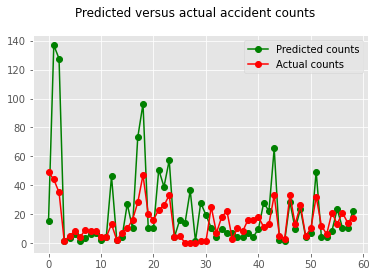

In [28]:
nb_predictions = model_4.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [42]:
#X["X2"] = X2_scaled
#X.sort_index(inplace=True)
Y = data['Y']
model_5 = sm.NegativeBinomial(Y,X).fit(method='nm', maxiter=1000)
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 5.545294
         Iterations: 273
         Function evaluations: 462
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                 -0.5003
Time:                        10:50:26   Log-Likelihood:                -327.17
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.7112      0.153      4.655      0.000       0.412    

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


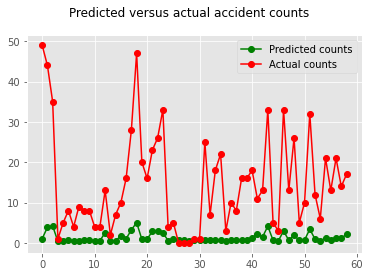

In [43]:
nb_predictions = model_5.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [31]:
X["X2"] = X2_scaled
X.sort_index(inplace=True)
Y = data['Y']
model_6 = sm.NegativeBinomial(Y,X).fit(method='bfgs', maxiter=1000)
print(model_6.summary())

Optimization terminated successfully.
         Current function value: 3.676985
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                0.005200
Time:                        10:44:23   Log-Likelihood:                -216.94
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.3217
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.4508      0.040     1

C:\Users\SSP\AppData\Local\Temp/ipykernel_10120/1291822170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["X2"] = X2_scaled


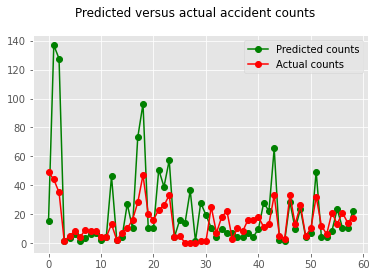

In [32]:
nb_predictions = model_6.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot:xlabel='X1'>

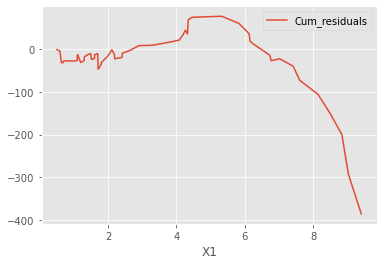

In [33]:
# CURE plot
data["fitted"] = model_6.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [41]:
#X = data[['X1', 'X2', 'X3']]
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
Y = data['Y']
model_7 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=1000)
print(model_7.summary())

         Current function value: 16.757788
         Iterations: 1000
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  -3.534
Time:                        10:49:37   Log-Likelihood:                -988.71
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.6627     90.668      0.007      0.994    -177.042     178.368
X2            -0.1444     83.540     -0.002      0.999    -163

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# CURE plot
data["fitted"] = model_7.predict()
data["residuals"] = data["Y"] - data["fitted"]

In [20]:
data.sort_values(by=['X1'], ascending=True, inplace=True)

In [21]:
data["Cum_residuals"] = data["residuals"].cumsum()

In [22]:
data.head()

,seg,Y,X1,X2,X3,fitted,residuals,Cum_residuals
28,31,0,0.505269,7307.333333,0.000000,4.910313,-4.910313,-4.910313
35,24,3,0.594510,7307.333333,1.682057,6.590997,-3.590997,-8.501310
29,30,1,0.633580,7307.333333,3.156663,8.449060,-7.449060,-15.950370
3,56,1,0.685524,8076.666667,0.000000,5.991754,-4.991754,-20.942125
6,53,4,0.695724,8076.666667,0.000000,6.006929,-2.006929,-22.949053


<AxesSubplot:xlabel='X1'>

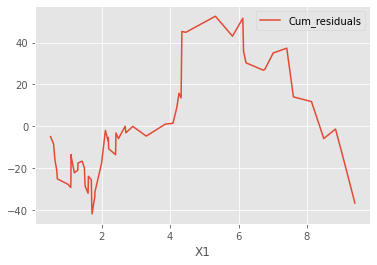

In [23]:
"""" Second, it is now easy to say what a good CURE plot should look like. It should
not have vertical drops because these are indicative of inordinately large
residuals—possible outliers. It should not have long increasing or decreasing runs
because these correspond to regions of consistent over and underestimation. It
should meander around the horizontal axis in a manner consistent with a “symmetric
random walk. """

data.plot(x= 'X1', y= 'Cum_residuals')

In [99]:
from sklearn.model_selection import KFold

X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

preds, scores = [], []
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for train_idx, test_idx in kfold.split(data):
    X_train, X_test = X[train_idx], X[test_idx]
    y_test = Y[test_idx]
    model = sm.GLM(data['Y'], data[['X1', 'X2', 'X3']], 
                     family=sm.families.NegativeBinomial()).fit()
    """"model = smf.glm(formula = "Y ~ w1 + w2 + w3 + C(w4)", 
                    data=, 
                    family=sm.families.NegativeBinomial()).fit()"""
    preds.append(model.get_prediction(X_test))
    scores.append(model.score(X_test, y_test))
print(scores)


AttributeError: 'GLMResults' object has no attribute 'score'

In [100]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   59
Model:                            GLM   Df Residuals:                       56
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -209.29
Date:                Sun, 19 Jun 2022   Deviance:                       32.925
Time:                        12:32:31   Pearson chi2:                     24.5
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2853
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2531      0.055      4.632      0.0

In [102]:
model.params

X1    0.253070
X2    0.000203
X3    0.190708
dtype: float64

In [43]:
from statsmodels.graphics.api import abline_plot

In [54]:
nobs = my_model.nobs
y = data['Y']
yhat = my_model.mu

In [55]:
for i in range(0,59):
    print(y[i] - yhat[i])

30.485206251250727
-12.45030685540219
-22.001248046103832
-5.153690013048789
-2.5510547968358708
-3.0141451786479596
-2.1695955777476845
1.5770605030725546
-2.492208938613542
-4.639392715514127
-3.760031751983533
-5.853936358372263
-22.441094740336432
-5.992827632608344
-2.511700375765745
-15.28351546723449
0.008713773178843809
-19.469558064724076
5.627970779471468
11.174357047991691
5.940124535591389
-3.4141247351926474
0.757738867473492
11.495254005408384
-2.8996988416899923
-4.994266631600157
-8.349501052248891
-9.527886437005849
-5.0272787419267155
-8.481572811461222
-6.026964417613544
15.960540791635925
0.849639174091533
11.048065088269606
13.125496949393114
-2.14210786131114
2.874137721744315
-0.24327709758006222
9.348904071575184
9.01966766072723
5.651079243831536
-9.62202600603598
-2.7542490042886296
-5.04719366725908
-1.7967824726763082
-2.2864665145362304
6.901995746718612
4.735266422825282
6.3594009595114755
-1.9471807714896778
1.3742289180030127
0.8332548636942683
2.7649609

In [56]:
my_model.fittedvalues

0     18.514794
1     56.450307
2     57.001248
3      6.153690
4      7.551055
5     11.014145
6      6.169596
7      7.422939
8     10.492209
9     12.639393
10     7.760032
11     9.853936
12    35.441095
13     7.992828
14     9.511700
15    25.283515
16    15.991286
17    47.469558
18    41.372029
19     8.825643
20    10.059875
21    26.414125
22    25.242261
23    21.504746
24     6.899699
25     9.994267
26     8.349501
27     9.527886
28     5.027279
29     9.481573
30     7.026964
31     9.039459
32     6.150361
33     6.951935
34     8.874503
35     5.142108
36     7.125862
37     8.243277
38     6.651096
39     6.980332
40    12.348921
41    20.622026
42    15.754249
43    38.047194
44     6.796782
45     5.286467
46    26.098004
47     8.264734
48    19.640599
49     6.947181
50     8.625771
51    31.166745
52     9.235039
53     6.186197
54    14.136124
55    12.570159
56    15.015326
57    14.413876
58    22.540385
dtype: float64